In [1]:
import os
import datetime
import matplotlib.pyplot as plt
from davitpy import utils
from imagers.ssusi import ssusi_utils
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
%pylab inline
# import the sd-data overlay module
import os
import sys
module_path = os.path.abspath(os.path.join('../py/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import sd_scan_muh

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
inpDir = "../data/dmsp/ssusi/prcsd/" # Make sure you have this dir or create it
fileDate = datetime.datetime( 2011, 7, 5 )
inpTime = datetime.datetime( 2011, 7, 5, 3, 40 )
coords="mlt"
satList = ["F18" ]#, "F17", "F18"]
figName = "../plots/ssusi-" + inpTime.strftime("%Y%m%d") + ".pdf" 

In [3]:
# SD plot variables
sapsTime = datetime.datetime( 2011, 7, 5, 4, 5 )
sapsRadList = [ "cvw", "cve","fhw",\
               "fhe", "bks", "wal" ]#[ "cvw" ]
sddata_type = "raw_los" 
selBeam = 9
sapsMlatRange = [ 50., 62. ]#[ 56., 60. ]
sapsVelCutoff = 50.
sapsNpointsCutoff = 50 # per radar per beam
velScale = [ -500, 500 ]

reading data from---> ../data/dmsp/ssusi/prcsd/F18/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F17/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F16/20110705.txt


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


converting from geo to aacgm coordinates


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


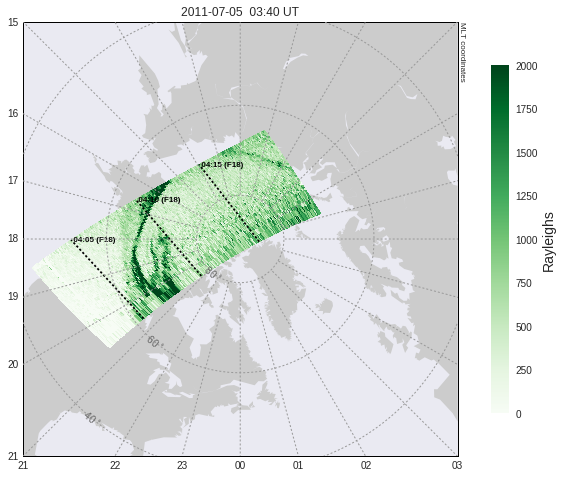

In [4]:
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )
# PLOT DATA
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40.)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=inpTime, vmin=0., vmax=2000., autoScale=False, coords=coords,alpha=1. )

fig.savefig(figName,bbox_inches='tight')

reading data from---> ../data/dmsp/ssusi/prcsd/F18/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F17/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F16/20110705.txt


2011-07-05 04:05:00 2011-07-05 04:07:00
2011-07-05 04:05:00 2011-07-05 04:07:00
2011-07-05 04:05:00 2011-07-05 04:07:00


ERROR:root:Sorry, we could not find any data for you :(
ERROR:root:Your pointer does not point to any data


converting from geo to aacgm coordinates


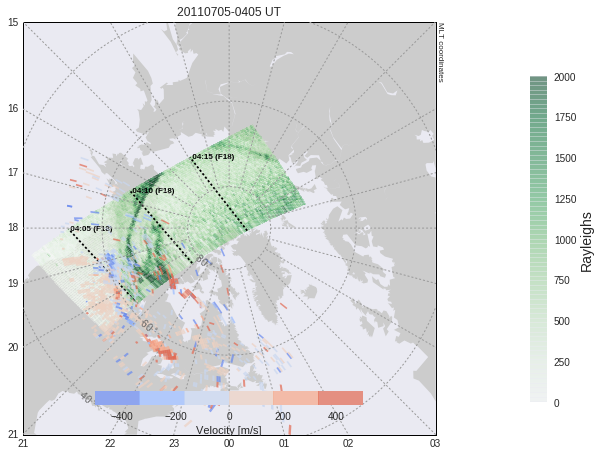

In [5]:
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )
# PLOT DATA
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40.)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
# Overlay SD data
velSeaMap = ListedColormap( sns.color_palette("coolwarm") )
obj = sd_scan_muh.sdvel_on_map(m, ax, sapsRadList, sapsTime)
colNorm = Normalize( vmin=velScale[0], vmax=velScale[1] )
obj.overlay_raw_data(param="velocity", gsct=1,\
                     fill=True, vel_lim=velScale,\
                     zorder=8, cmap=velSeaMap, norm=colNorm, alpha=0.7)

#Overlay SSUSI data
ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=inpTime, vmin=0., vmax=2000.,\
            autoScale=False, coords=coords,alpha=0.3,\
            cbar_shrink=0.75, titleString=sapsTime.strftime("%Y%m%d-%H%M") + " UT" )
cax = plt.colorbar(obj.losvel_mappable,ax=ax,cmap=velSeaMap,\
             orientation='horizontal', shrink=0.5, pad=-0.1)
cax.set_label('Velocity [m/s]')
fig.savefig("../plots/ssusi-sd-" + inpTime.strftime("%Y%m%d") + ".pdf" ,bbox_inches='tight')